C:\Users\daiki\AppData\Local\Temp\ipykernel_14328\1974192092.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


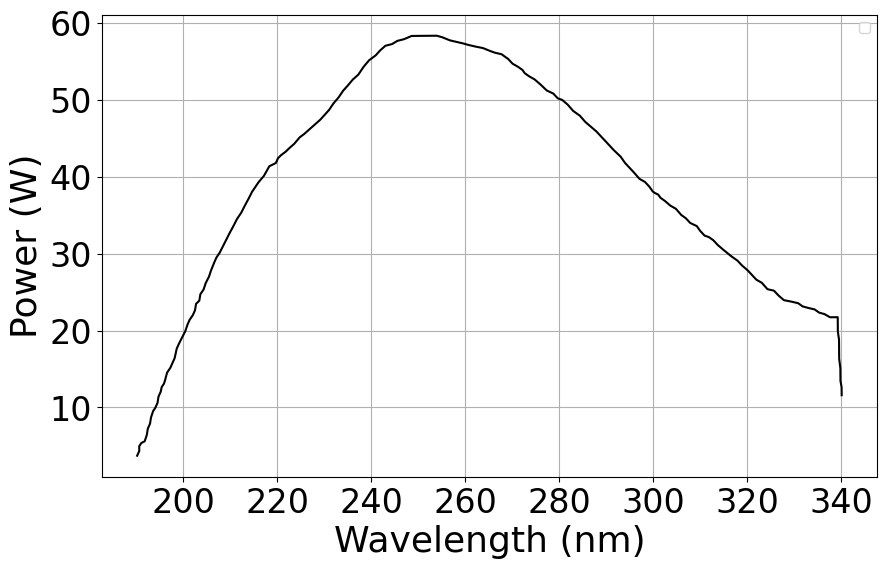

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('UV_lamp_spectol.csv')

# Create plot with black color
plt.figure(figsize=(10, 6))
plt.plot(df['189.72370096053697'], df[' 3.104064601576468'], color='black')

# Set graph properties with larger font sizes
plt.xlabel('Wavelength (nm)', fontsize=26)
plt.ylabel('Power (W)', fontsize=26)
plt.grid(True)

# Make tick labels larger
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.legend()

# Display the plot
plt.show()


In [1]:
# 物理定数
h = 6.62607015e-34  # プランク定数 [J·s]
c = 2.99792458e8    # 光速 [m/s]
q = 1.602176634e-19 # 素電荷 [C]

# 与えられた値
eta = 0.1           # η
f = 0.1             # f
M = 2               # M
lambda_m = 30e-6    # λ [m] (30 μm)

# R = ηqfMλ/hc の計算
numerator = eta * q * f * M * lambda_m
denominator = h * c
R = numerator / denominator

print(f"分子 (ηqfMλ) = {numerator:.6e}")
print(f"分母 (hc) = {denominator:.6e}")
print(f"R = {R:.6e}")
print(f"R = {R:.3f}")


分子 (ηqfMλ) = 9.613060e-26
分母 (hc) = 1.986446e-25
R = 4.839326e-01
R = 0.484


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の定義
h = 6.626e-34
c = 2.998e17

# 波長の配列作成
wavelengths = np.linspace(189.72370096053697, 340, 1000)

# 指定時間点（分）- float64型で作成
specific_times_min = np.array([0, 60, 80, 90, 100, 110, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510], dtype=np.float64)
specific_times_sec = specific_times_min * 60

# 各時間点でのフォトン数密度を計算
N_specific = np.zeros_like(specific_times_sec, dtype=np.float64)
for wavelength in wavelengths:
    N = (6009.42714145 * specific_times_sec) / (h * c * wavelength)
    N_specific += N * (wavelengths[1] - wavelengths[0])

# 結果表示
print("Time (min) | Photon Number Density")
print("-" * 40)
for time, density in zip(specific_times_min, N_specific):
    print(f"{time:8.0f} | {density:.2e}")

print("\nTotal Photon Number Density:", f"{np.sum(N_specific):.2e}")


Time (min) | Photon Number Density
----------------------------------------
       0 | 0.00e+00
      60 | 6.36e+22
      80 | 8.48e+22
      90 | 9.54e+22
     100 | 1.06e+23
     110 | 1.17e+23
     120 | 1.27e+23
     150 | 1.59e+23
     180 | 1.91e+23
     210 | 2.23e+23
     240 | 2.54e+23
     270 | 2.86e+23
     300 | 3.18e+23
     330 | 3.50e+23
     360 | 3.82e+23
     390 | 4.13e+23
     420 | 4.45e+23
     450 | 4.77e+23
     480 | 5.09e+23
     510 | 5.41e+23

Total Photon Number Density: 5.14e+24


Time (min) | Photon Density (photons/m²)
--------------------------------------------------
       0 | 0.00e+00
      60 | 9.13e+23
      80 | 1.22e+24
      90 | 1.37e+24
     100 | 1.52e+24
     110 | 1.67e+24
     120 | 1.83e+24
     150 | 2.28e+24
     180 | 2.74e+24
     210 | 3.20e+24
     240 | 3.65e+24
     270 | 4.11e+24
     300 | 4.56e+24
     330 | 5.02e+24
     360 | 5.48e+24
     390 | 5.93e+24
     420 | 6.39e+24
     450 | 6.85e+24
     480 | 7.30e+24
     510 | 7.76e+24

Total Photon Density (photons/m²): 7.38e+25


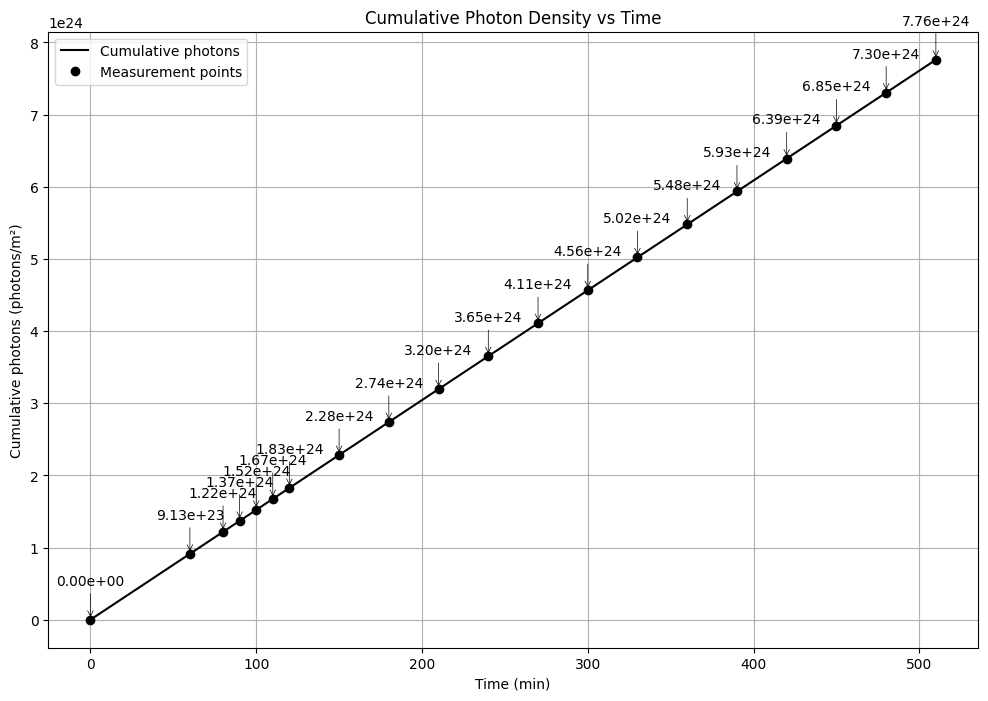

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.626e-34
c = 2.998e17

# Wavelength array
wavelengths = np.linspace(189.72370096053697, 340, 1000)

# Time points
t_min = np.linspace(0, 510, 1000)
t_sec = t_min * 60

specific_times_min = np.array([0, 60, 80, 90, 100, 110, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510], dtype=np.float64)
specific_times_sec = specific_times_min * 60

# Calculate continuous photon density
N_total = np.zeros_like(t_sec, dtype=np.float64)
for wavelength in wavelengths:
    N = (6009.42714145 * t_sec) / (h * c * wavelength)
    N_total += N * (wavelengths[1] - wavelengths[0])

# Convert to ph (photons/m^2)
ph_total = N_total / 0.0696637

# Calculate specific time points photon density
N_specific = np.zeros_like(specific_times_sec, dtype=np.float64)
for wavelength in wavelengths:
    N = (6009.42714145 * specific_times_sec) / (h * c * wavelength)
    N_specific += N * (wavelengths[1] - wavelengths[0])

# Convert to ph (photons/m^2)
ph_specific = N_specific / 0.0696637

# Create enhanced plot
plt.figure(figsize=(12, 8))
plt.plot(t_min, ph_total, 'k-', label='Cumulative photons')
plt.plot(specific_times_min, ph_specific, 'ko', label='Measurement points')

plt.xlabel('Time (min)')
plt.ylabel('Cumulative photons (photons/m²)')
plt.title('Cumulative Photon Density vs Time')
plt.grid(True)
plt.legend()

# Scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Add value annotations for all points with black arrows
for t, n in zip(specific_times_min, ph_specific):
    plt.annotate(f'{n:.2e}', 
                (t, n),
                textcoords="offset points", 
                xytext=(0, 25),
                ha='center',
                arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

# Display values in console
print("Time (min) | Photon Density (photons/m²)")
print("-" * 50)
for time, density in zip(specific_times_min, ph_specific):
    print(f"{time:8.0f} | {density:.2e}")

print("\nTotal Photon Density (photons/m²):", f"{np.sum(ph_specific):.2e}")

plt.show()


In [5]:
import numpy as np
from scipy import integrate

# 定数
solar_constant = 1366  # W/m²
h = 6.626e-34  # プランク定数 (J·s)
c = 3e8  # 光速 (m/s)

# 天体の軌道半径(AU)
earth_au = 1.0
triton_au = 30.1
pluto_au = 39.5

# 波長範囲
lambda_min = 190e-9
lambda_max = 340e-9

def photon_energy(wavelength):
    return h * c / wavelength

def photon_flux(wavelength):
    intensity = solar_constant / (lambda_max - lambda_min)
    return intensity / photon_energy(wavelength)

# 地球での光子数密度
earth_flux = integrate.quad(photon_flux, lambda_min, lambda_max)[0]

# 各天体での光子数密度計算
triton_flux = earth_flux / (triton_au ** 2)
pluto_flux = earth_flux / (pluto_au ** 2)

print(f"UV Photon flux density (photons/m²/s):")
print(f"Earth (1.0 AU): {earth_flux:.2e}")
print(f"Triton (30.1 AU): {triton_flux:.2e}")
print(f"Pluto (39.5 AU): {pluto_flux:.2e}")


UV Photon flux density (photons/m²/s):
Earth (1.0 AU): 1.82e+21
Triton (30.1 AU): 2.01e+18
Pluto (39.5 AU): 1.17e+18
